1.4 Geetting data
=============================
This notebook will introduce the techniques to access data in the web using services request.<br>
Accessing data via services request is the easiest way. The data is requested using an API available at the server.<br>
Before getting access to it, the user must get an **api_key** to authenticate the call.<br>
The Python's module dealing with the API mode is **requests**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

We need the URL where data are located.<br>
URL's tend to have information related to the data we are after.

In [9]:
url = 'https://www.quandl.com/api/v3/datasets/CHRIS/MGEX_IH1.json?api_key=DotPcR2Bpi7uezRsnS-S'

Here, **CHRIS** is the dataset, **MGEX_IH1** is the data code and **DotPcR2Bpi7uezRsnS-S** is the api_key.<br>
We can use a clever way to create the URL.

In [2]:
dataset = 'EURONEXT'
code = 'TFA'
apikey = 'DotPcR2Bpi7uezRsnS-S'

In [3]:
url = 'https://www.quandl.com/api/v3/datasets/%s/%s.json?api_key=%s' % (dataset,code,apikey)
print(url)

https://www.quandl.com/api/v3/datasets/EURONEXT/TFA.json?api_key=DotPcR2Bpi7uezRsnS-S


To get the data, we simply need to call the **get** method from **requests**

In [4]:
response = requests.get(url)

The return is a JSON file (look at the URL...).<br>
JSON files are the most frequent file format when accesing data through APIs.<br>
We just need to _activate_ the response with the **.json** method

In [9]:
RESPONSE = response.json()

Now we are able to print the RESPONSE.<br>
AS you can see the JSON format looks very similar to a dictionnary...

In [10]:
RESPONSE

{'dataset': {'id': 9820710,
  'dataset_code': 'TFA',
  'database_code': 'EURONEXT',
  'name': 'Telefonica (TFA)',
  'description': 'Stock Prices for Telefonica from the Euronext Stock Exchange. Currency: EUR. Market: Traded not listed Brussels',
  'refreshed_at': '2019-01-25T17:15:37.636Z',
  'newest_available_date': '2019-01-25',
  'oldest_available_date': '2014-02-14',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Last',
   'Volume',
   'Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2014-02-14',
  'end_date': '2019-01-25',
  'data': [['2019-01-25', 7.654, 7.654, 7.654, 7.654, 530.0, 4056.62],
   ['2019-01-23', 7.66, 7.704, 7.66, 7.704, 600.0, 4609.2],
   ['2019-01-16', 7.544, 7.544, 7.532, 7.532, 1562.0, 11770.98],
   ['2019-01-15', 7.545, 7.545, 7.545, 7.545, 106.0, 799.77],
   ['2019-01-14', 7.317, 7.317, 7.317, 7.317, 380.0, 2780.46],
   ['2019-01-11',

Likewise dictionaries, information is accesible through _keys_

In [11]:
RESPONSE['dataset']['column_names']

['Date', 'Open', 'High', 'Low', 'Last', 'Volume', 'Turnover']

And we can convert the data into a Pandas DataFrame.

In [12]:
DATA = pd.DataFrame.from_dict(RESPONSE['dataset']['data'])

In [13]:
# Let's rename the columns
DATA.columns = RESPONSE['dataset']['column_names']

In [14]:
DATA.head()

,Date,Open,High,Low,Last,Volume,Turnover
0,2019-01-25,7.654,7.654,7.654,7.654,530.0,4056.62
1,2019-01-23,7.660,7.704,7.660,7.704,600.0,4609.20
2,2019-01-16,7.544,7.544,7.532,7.532,1562.0,11770.98
3,2019-01-15,7.545,7.545,7.545,7.545,106.0,799.77
4,2019-01-14,7.317,7.317,7.317,7.317,380.0,2780.46


Done! Now we can play around with the data.

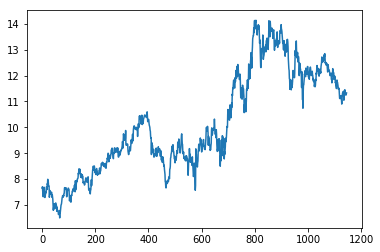

In [15]:
plt.plot(DATA['Last'])